OpenCV SIFT descriptors shape: (285, 128)
Custom SIFT descriptors shape: (285, 128)


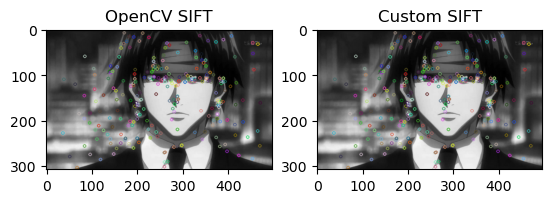

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_descriptors(image, keypoints, size=16, bin_size=4):
    grad_x, grad_y = np.gradient(image.astype(np.float32))
    descriptors = []

    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        patch = image[y-size:y+size, x-size:x+size]
        grad_x_patch, grad_y_patch = grad_x[y-size:y+size, x-size:x+size], grad_y[y-size:y+size, x-size:x+size]

        magnitudes = np.sqrt(grad_x_patch**2 + grad_y_patch**2)
        orientations = np.arctan2(grad_y_patch, grad_x_patch) * 180 / np.pi
        orientations[orientations < 0] += 360

        histograms = np.zeros((bin_size, bin_size, 8))
        for i in range(bin_size):
            for j in range(bin_size):
                bin_x, bin_y = i * size // bin_size, j * size // bin_size
                mag = magnitudes[bin_x:bin_x + size // bin_size, bin_y:bin_y + size // bin_size].flatten()
                ori = orientations[bin_x:bin_x + size // bin_size, bin_y:bin_y + size // bin_size].flatten()
                for k in range(len(mag)):
                    bin_idx = int(ori[k] / 45) % 8
                    histograms[i, j, bin_idx] += mag[k]

        descriptor = histograms.flatten()
        descriptor /= np.linalg.norm(descriptor) + 1e-7
        descriptors.append(descriptor)

    return np.array(descriptors)

def apply_sift(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)

    custom_descriptors = compute_descriptors(img, keypoints)

    print(f"OpenCV SIFT descriptors shape: {descriptors.shape}")
    print(f"Custom SIFT descriptors shape: {custom_descriptors.shape}")

    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
    plt.subplot(1, 2, 1)
    plt.title('OpenCV SIFT')
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title('Custom SIFT')
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.show()

# Example usage
apply_sift('/home/student/Pictures/Screenshots/Screenshot from 2024-12-07 11-48-12.png')